In [50]:
from IPython.display import Image

##### Task: Predict handrawn digits with keras.

## MNIST dataset

* Labeled dataset of handwritten digits

* Digits drawn by different individuals

* 50,000 training, 10,000 testing

* Already preprocessed

* Great set for first expirementing with NNs.

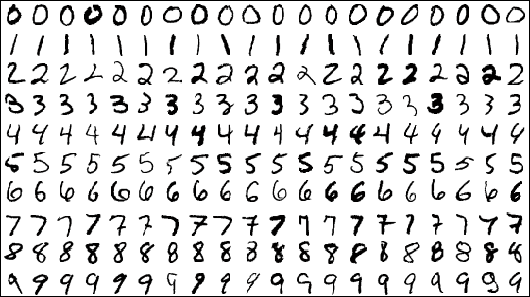

In [51]:
Image('./Image Folder/mnistExamples.png')

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

##  Reading in MNIST data

In [53]:
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data

In [54]:
# Gathering the test data. Take note that the labels are in one_hot format.
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

#Gathering training, testing data.
train, train_lables = mnist.train.images, mnist.train.labels
test_data, test_labels = mnist.test.images, mnist.test.labels

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


#### Here are some example digits from the dataset.

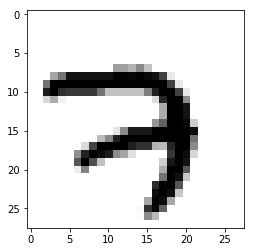

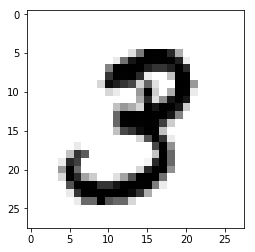

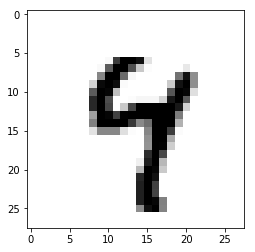

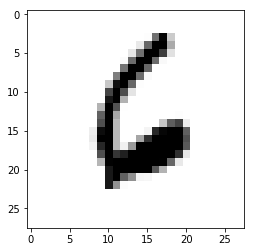

In [55]:
for image in train[0:4]:
    plt.imshow(image.reshape(28,28))
    plt.set_cmap('binary')
    plt.show()    

#### What the actual data looks like

In [56]:
train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

# Defining models with keras is easy. 
Reference the keras document for all the different model options. ( keras.io/getting-started/sequential-model-guide/ )

In [57]:
def non_conv_model():
    model = Sequential()
    model.add(Dense(units=100, input_dim=28*28, activation='relu'))
    model.add(Dense(units=100, activation='relu'))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    return model

In [58]:
def conv_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), activation='relu', data_format="channels_last",
                     input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

#### Choose your model.

In [59]:
# Uncomment for convolutional network
model = conv_model()
train = train.reshape(train.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)


# Uncommment for non-convolutional network.
#model = non_conv_model()


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
# Method describes the model and trainable params on it.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1025000   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10010     
Total para

**The fit method is very handy. Takes out all the batch logic that we are used to in tensorflow.**

In [62]:
hist = model.fit(train, train_lables, batch_size=4096, epochs=20, validation_data=(test_data, test_labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 74s - loss: 0.7203 - acc: 0.8116 - val_loss: 0.3805 - val_acc: 0.8852
Epoch 2/20
55000/55000 [==============================] - 74s - loss: 0.3319 - acc: 0.9022 - val_loss: 0.2314 - val_acc: 0.9314
Epoch 3/20
55000/55000 [==============================] - 74s - loss: 0.2165 - acc: 0.9373 - val_loss: 0.1619 - val_acc: 0.9508
Epoch 4/20
55000/55000 [==============================] - 74s - loss: 0.1550 - acc: 0.9542 - val_loss: 0.1207 - val_acc: 0.9619
Epoch 5/20
55000/55000 [==============================] - 76s - loss: 0.1179 - acc: 0.9651 - val_loss: 0.0953 - val_acc: 0.9697
Epoch 6/20
55000/55000 [==============================] - 76s - loss: 0.0938 - acc: 0.9721 - val_loss: 0.0774 - val_acc: 0.9768
Epoch 7/20
55000/55000 [==============================] - 73s - loss: 0.0760 - acc: 0.9776 - val_loss: 0.0634 - val_acc: 0.9808
Epoch 8/20
55000/55000 [==============================

# Metrics used to analyze the results

In [63]:
test_preds = model.predict_classes(test_data)
confusion_matrix(list(map(np.argmax, test_labels)), test_preds)

10000/10000 [==============================] - 6s     


array([[ 975,    0,    0,    0,    0,    0,    1,    2,    2,    0],
       [   0, 1133,    0,    0,    0,    0,    1,    1,    0,    0],
       [   2,    2, 1013,    0,    2,    0,    0,    5,    7,    1],
       [   1,    0,    0,  998,    0,    5,    0,    3,    3,    0],
       [   0,    0,    1,    0,  978,    0,    1,    0,    1,    1],
       [   2,    0,    0,    4,    0,  882,    2,    1,    1,    0],
       [   4,    2,    0,    0,    1,    1,  950,    0,    0,    0],
       [   0,    2,    1,    0,    0,    0,    0, 1023,    1,    1],
       [   4,    0,    0,    0,    1,    1,    1,    2,  964,    1],
       [   2,    3,    0,    1,    5,    4,    0,    4,    1,  989]], dtype=int64)

In [64]:
print(classification_report(list(map(np.argmax, test_labels)), test_preds))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      1.00      1.00      1135
          2       1.00      0.98      0.99      1032
          3       1.00      0.99      0.99      1010
          4       0.99      1.00      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.98      1.00      0.99      1028
          8       0.98      0.99      0.99       974
          9       1.00      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



# Looking at some mispredicted numbers.

In [65]:
# Softmax provides a list of numbers that represent the classes. Each value is a probability.
# Index with highest probability is the prediction of the model.
preds = model.predict(test_data)
preds[0]

array([  3.06214574e-08,   1.25506130e-08,   1.03597040e-06,
         1.36209258e-06,   6.44700092e-12,   1.08346274e-08,
         2.01479889e-16,   9.99996543e-01,   1.70905459e-08,
         9.68815698e-07], dtype=float32)

In [66]:
# Use np.argmax() to get the largest value out of array this will be the prediction for the digit.
np.argmax(preds[0])

7

In [67]:
def show_bad_preds(preds, verbose=True):
    """
    Simple method that iterates through the test predictions to see what guesses we got wrong.
    """
    for index, image in enumerate(preds):
        title = "Predicted to be %s, is actually %s." % (np.argmax(preds[index]), np.argmax(test_labels[index]))
        if np.argmax(preds[index]) != np.argmax(test_labels[index]):
            if verbose:
                plt.title("Wrong Prediction: " + title)
            plt.imshow(test_data[index].reshape(28,28))
            plt.set_cmap('binary')
            plt.show()

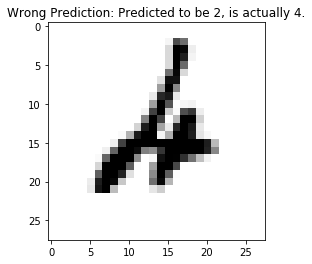

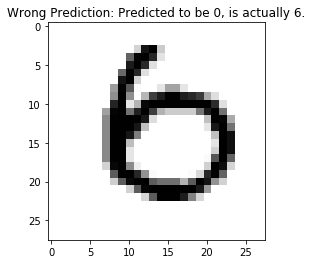

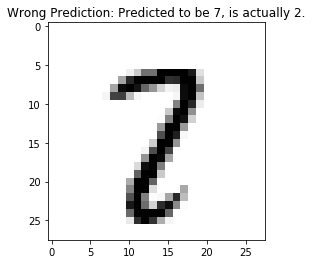

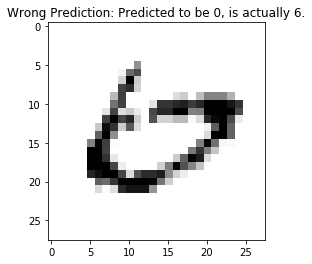

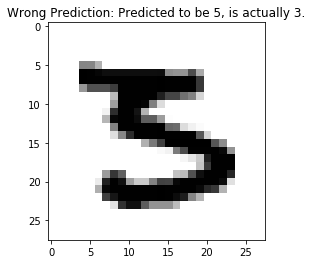

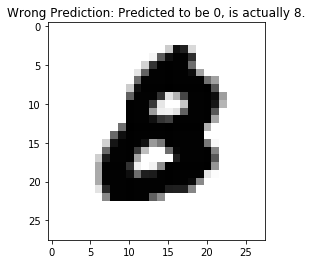

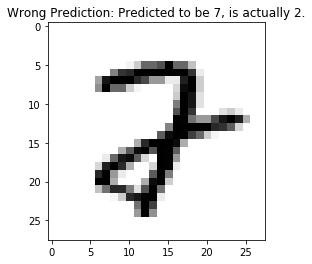

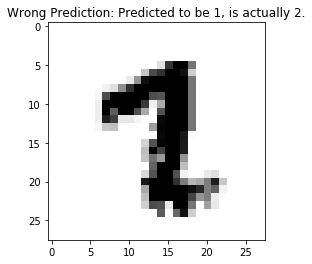

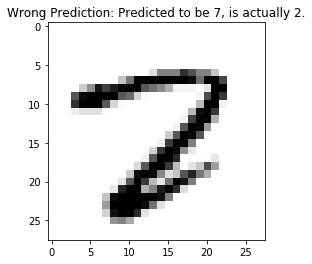

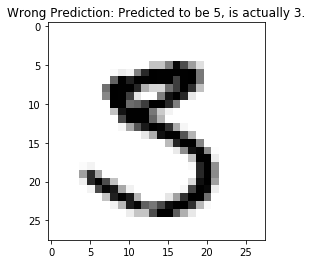

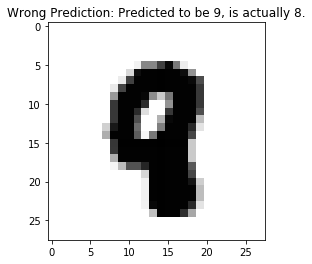

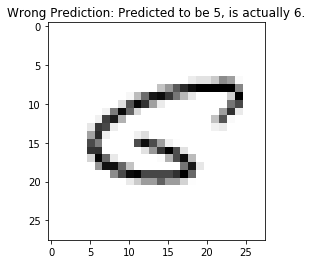

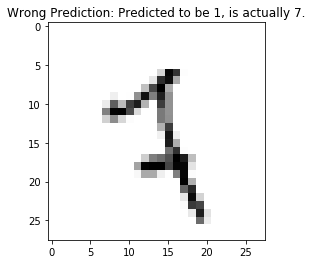

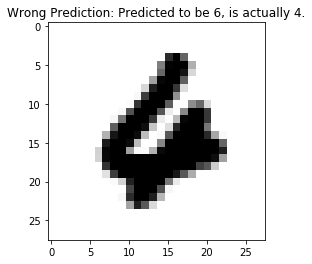

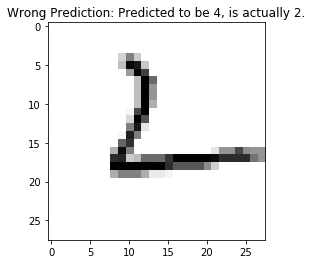

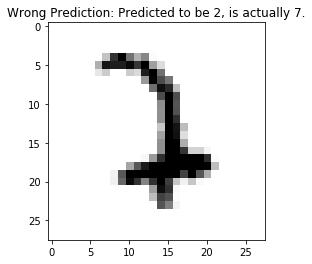

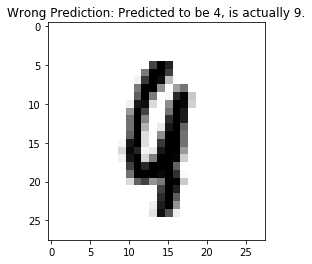

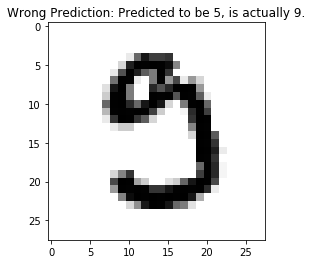

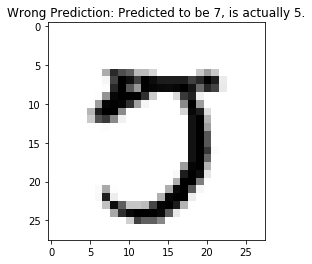

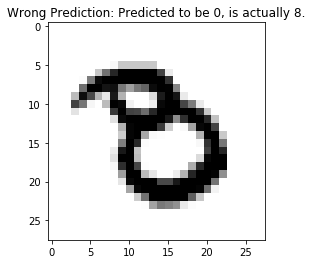

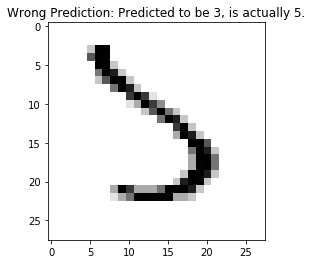

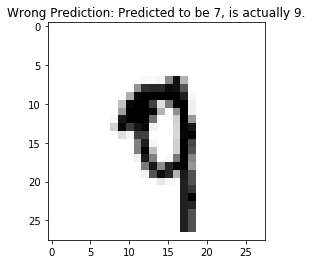

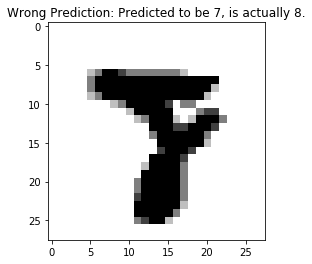

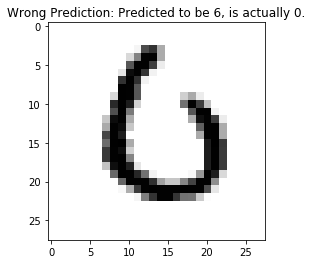

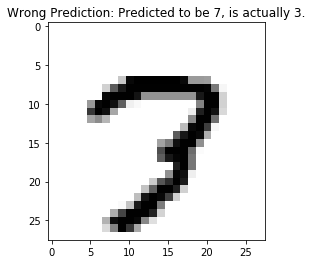

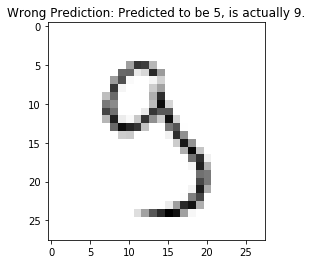

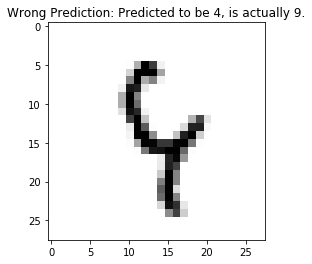

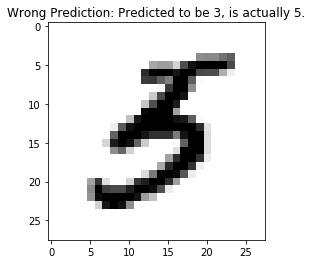

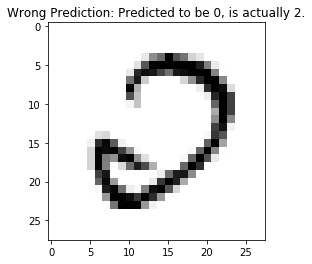

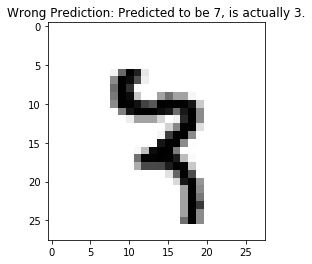

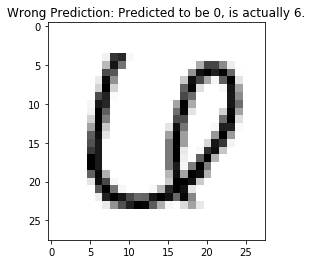

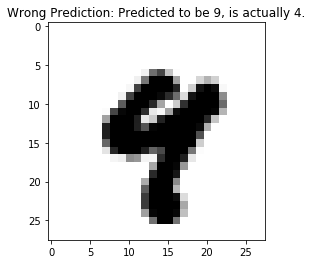

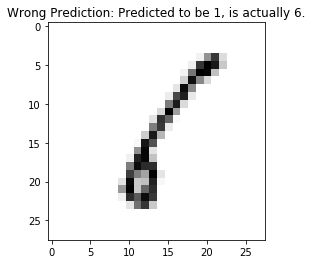

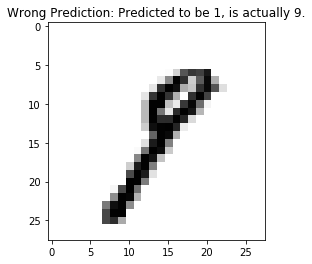

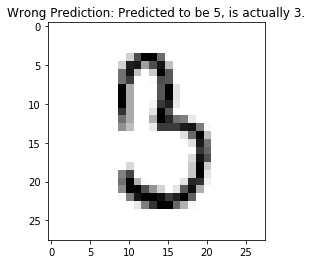

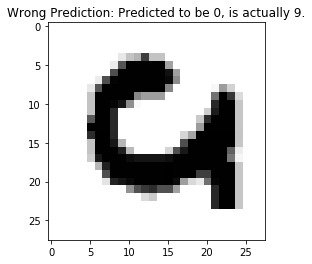

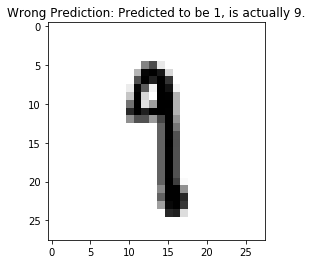

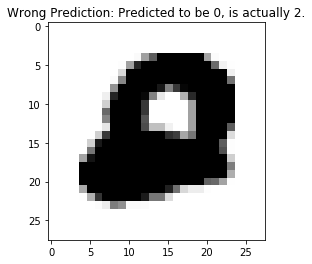

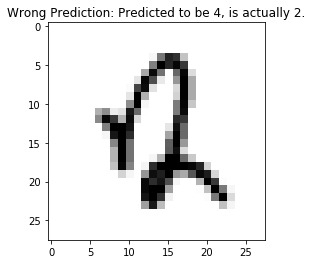

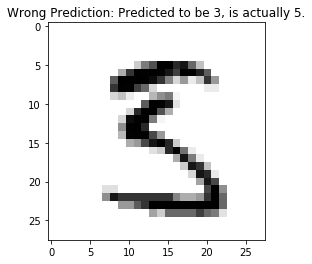

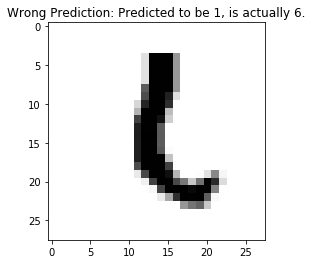

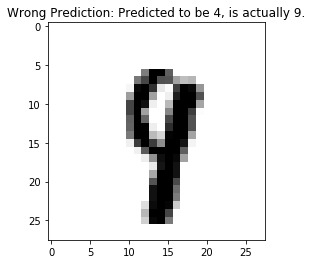

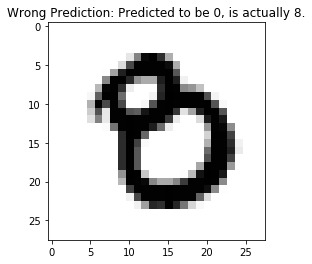

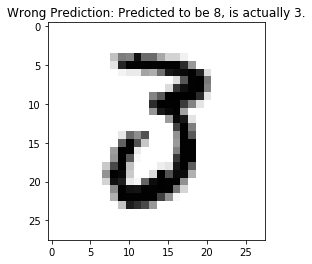

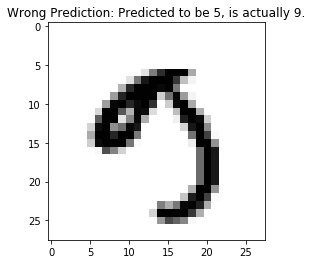

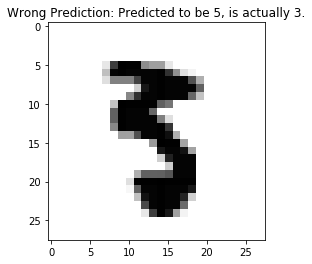

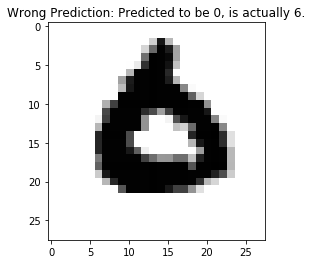

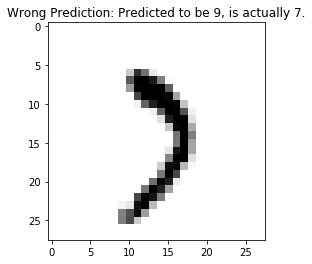

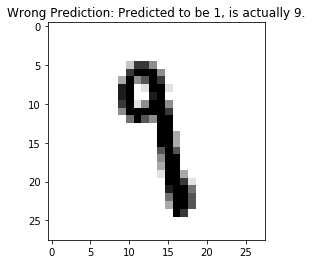

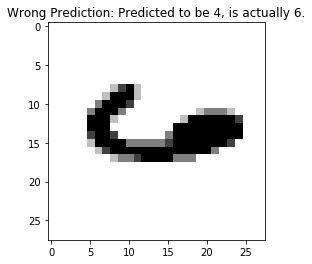

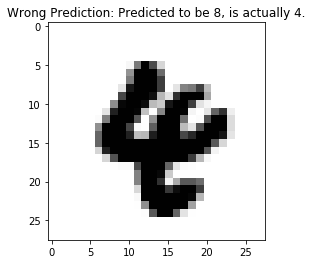

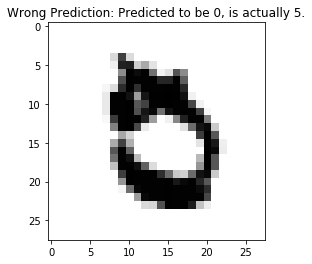

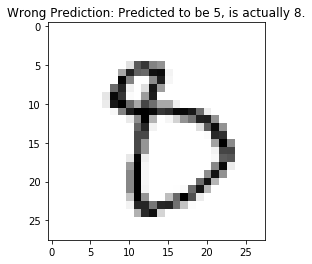

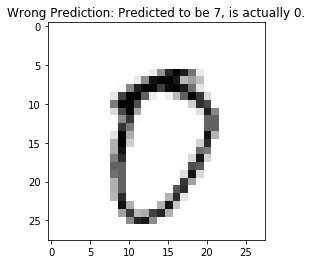

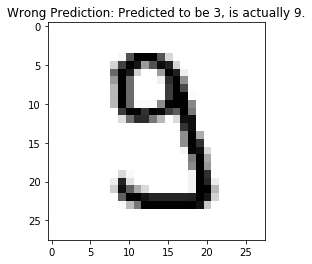

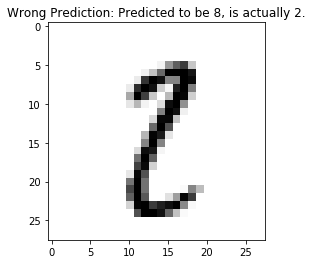

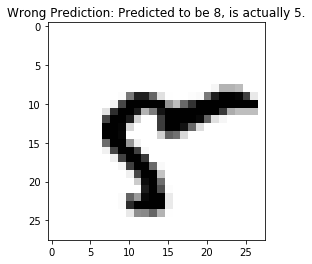

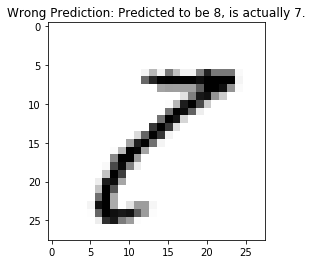

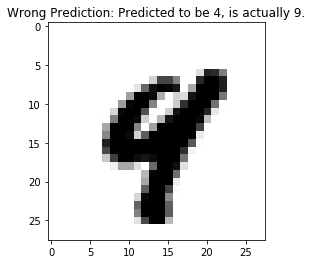

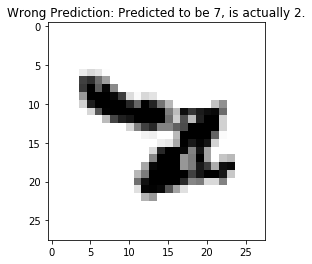

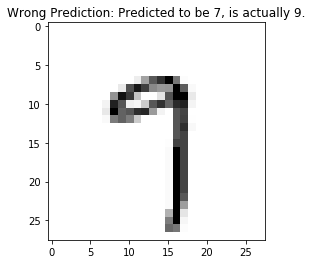

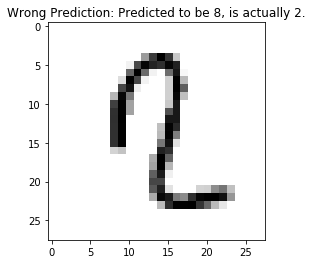

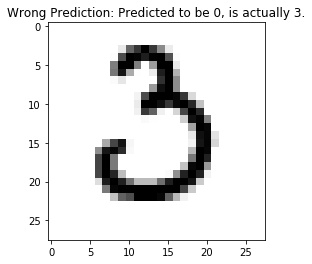

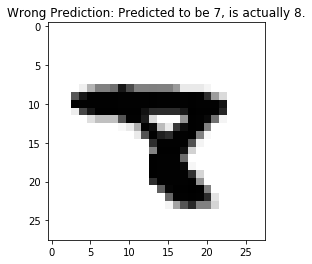

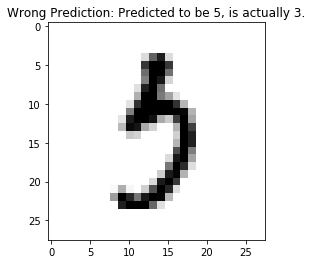

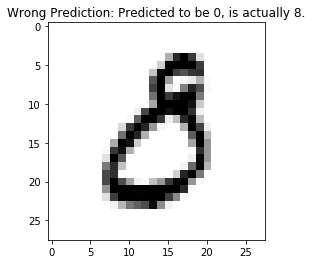

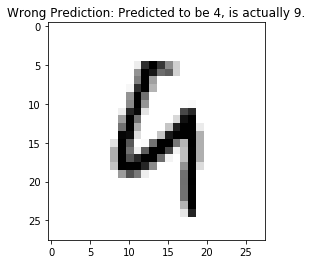

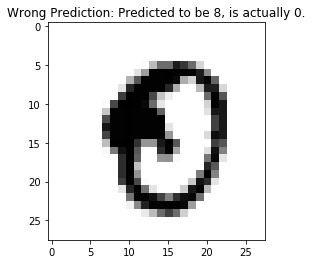

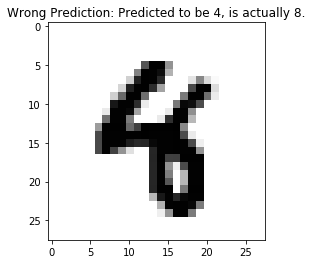

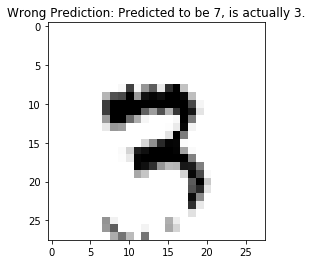

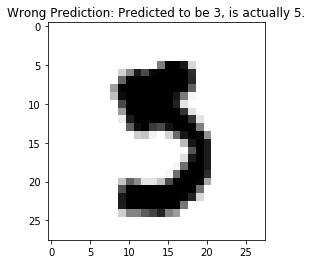

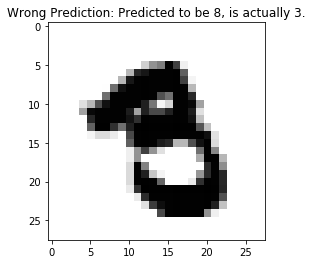

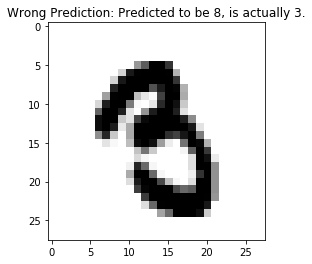

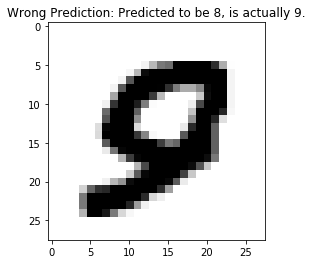

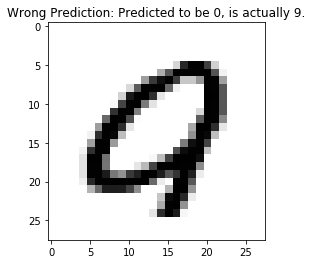

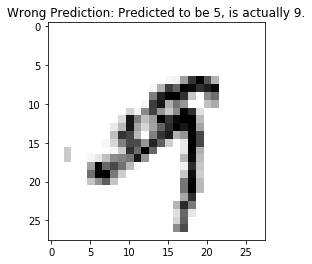

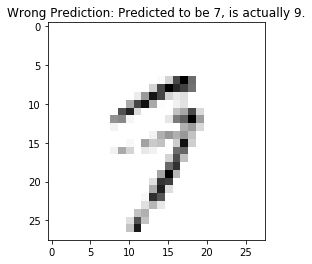

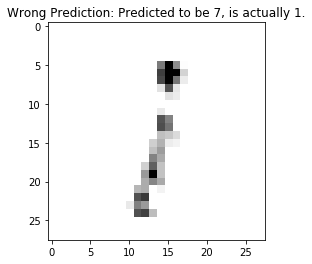

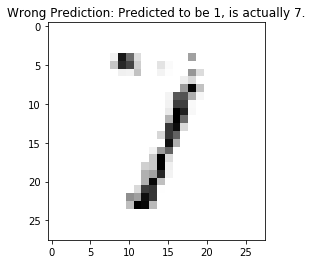

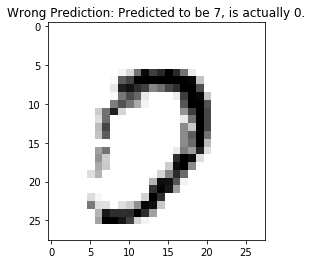

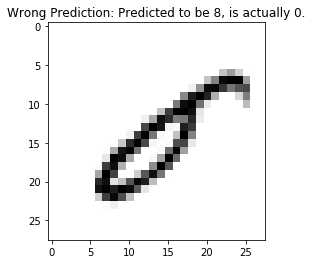

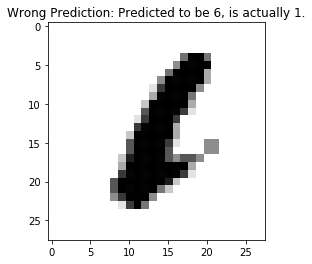

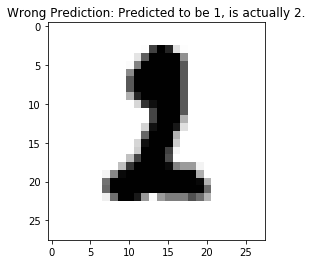

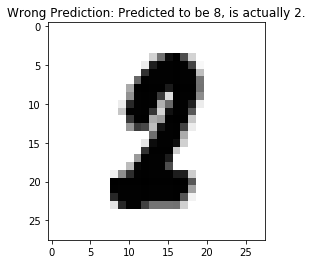

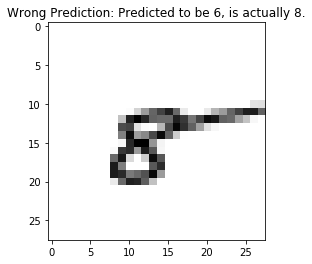

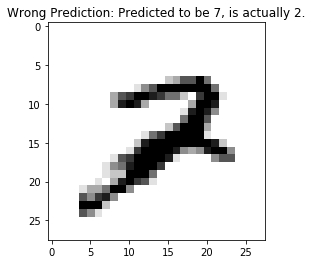

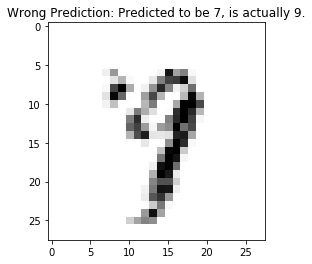

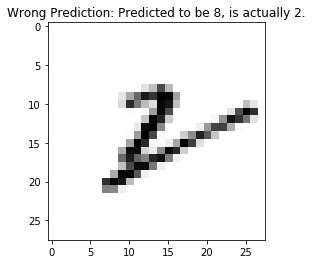

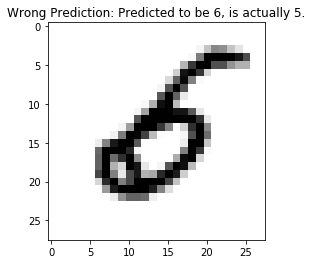

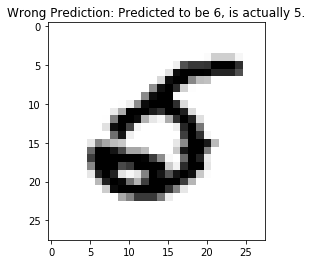

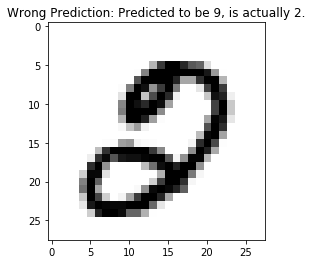

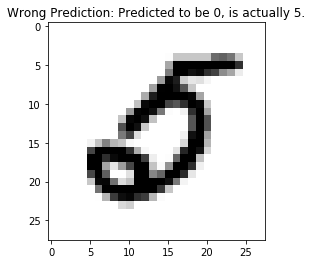

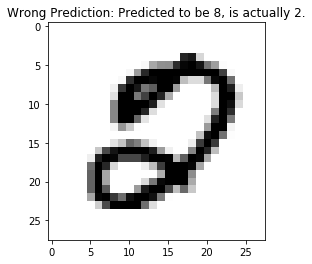

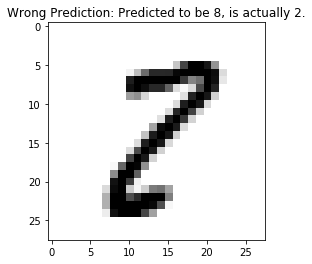

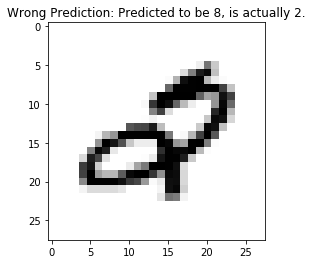

In [68]:
show_bad_preds(preds, verbose=True)